# Project: Medical Appointments No Shows 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row such as: 
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Possible diseases such as: hypertension, diabetes, alcoholism, handicap

The dependent variable - No-show- says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. (This is later reformated during analysis).
The original dataset has been sourced from Kaggle Dataset: Medical Appointment No Shows on 29th October 2018.

### Data Dictionary
* 01 - PatientId: Identification of a patient
* 02 - AppointmentID: Identification of each appointment
* 03 - Gender: Male or Female . 
* 04 - Age How old is the patient.
* 05 - ScheduledDay: The day at which the patient set up his appointment.
* 06 - AppointmentDay: The day at which the patient should show up for his appointment.
* 07 - Neighbourhood: Where the appointment takes place.
* 08 - Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* 09 - Hipertension: True or False
* 10 - Diabetes: True or False
* 11 - Alcoholism: True or False
* 12 - Handcap: True or False
* 13 - SMS_received: 1 or more messages sent to the patient.
* 14 - No-show: True or False.

### Research Questions
The main interest of this project is figuring out:

* What factors are important to know in order to predict if a patient will show up for their scheduled appointment?


In [245]:
# importing all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [246]:
# load in the dataset into a pandas dataframe
noshowappointments = pd.read_csv('C://Users//piyush.nandwani//Downloads//noshowappointments-kagglev2-may-2016.csv')

In [247]:
noshowappointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [248]:
def df_report(df):
    """This gives quick report about the missing values, unique numbers and datatypes.
    The argument is the DataFrame
    """
    n_missing = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False)
    n_unique = df.nunique()
    D_types = df.dtypes
    report = pd.concat([n_missing, n_unique, D_types], axis=1, keys = ["%_missing", "no_unique", "data_types"])
    return display(report)

In [249]:
# get the shape of dataset
data_dim = noshowappointments.shape
print( "There are {} records in the dataset with {} features.".format(data_dim[0],data_dim[1]))

There are 110527 records in the dataset with 14 features.


In [250]:
# generate the data quality report
df_report(noshowappointments)

,%_missing,no_unique,data_types
PatientId,0.0,62299,float64
AppointmentID,0.0,110527,int64
Gender,0.0,2,object
ScheduledDay,0.0,103549,object
AppointmentDay,0.0,27,object
Age,0.0,104,int64
Neighbourhood,0.0,81,object
Scholarship,0.0,2,int64
Hipertension,0.0,2,int64
Diabetes,0.0,2,int64


> There seems to be no missing values and most variables are numeric in nature, but the variables `AppointmentDay` and `ScheduledDay` are of the wrong data type. Date/Time variables should have type `datetime`.<br>
AppointmentID is unique for each entry.

In [251]:
# generate basic statistics
noshowappointments.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


>It could be seen from the basic statistical description above that there is a presence of invalid value in the `Age` variable -  negative one (-1) appeared to be the minimum value. This variable will be explored further to confirm the suspected issue. Also, the no_show variable looks confusing and should be redefined to make it look non-confusing - 'yes' should be used for patients that showed up, otherwise 'no'.

##### Some more data exploration

In [252]:
# look into the Age variable
noshowappointments['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

> Age has a value of -1 which is invalid. The row containing this value would be best removed during cleaning to retain the data quality. Now, let's check for duplicated record in the dataset:

In [253]:
# check for duplicates
noshowappointments.duplicated().sum()

0

> There seems to be no duplicated data in the dataset using all variables for check. However, since the AppointmentDay is unique to each data entry, it might be that it is automatically generated and many records could have been entered multiple times. This would be investigated below: 

In [254]:
# check for dataset columns
noshowappointments.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [255]:
noshowappointments.duplicated(subset=['PatientId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'No-show']).sum()

1305

> Seeing 1305 repeated records. Dropping these records is justified since it couldn't be coincidental that a patientID having the same AppointmentDay and ScheduledDay is repeated.

### The structure of the dataset
There are 110,527 records in the dataset with 14 features ('PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received' and 'No-show'). Most variables are numeric in nature, but the variables AppointmentDay and ScheduledDay are of the wrong data type.
Also, the dataset seems not to contain any missing value, whereas, it could be seen that the minimum in the 'Age' variable is a negative number (-1) which is invalid. This would be further checked and treated in the data cleaning section

### The main features of interest in the dataset
I'm most interested in figuring out what factors are important to know in order to predict if a patient will show up for their scheduled appointment

### Define Cleaning tasks

1.   Remove invalid value in the `Age` variable
2.   Drop duplicated records
3.   Change `ScheduledDay` and `AppointmentDay` datatypes to datetime
4.   Rename and reformat the label to have patients that showed up represented with 'yes' and patients that didn't show up, 'no'.
5.   Do feature engineering on the existing variables to extract new variables. E.g Day of the week for the scheduled date
6.   Drop all columns that are irrelavant to research purpose

### Data Cleaning
In this section, the define, code, and test steps of the cleaning
process are used to properly document the processes involved in the cleaning of the dataset

In [256]:
# duplicate the dataset
df = noshowappointments.copy()

##### Define:
Remove the invalid value (-1) in the 'Age' variable by dropping the row containing any value lesser than zero.

##### Code

In [257]:
df.drop((df[df['Age'] < 0].index), inplace=True)

#### Test

In [258]:
df.loc[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<b>Good!</b> Now, we obtain the dataset with no negative age value.

##### Define:
Drop duplicated records

##### Code

In [259]:
df.drop_duplicates(subset=['PatientId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'No-show'], inplace=True)

##### Test

In [260]:
df.duplicated(subset=['PatientId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'No-show']).sum()

0

<b>Great!</b> Now, we obtain the dataset with no duplicated records.

##### Define:
Change ScheduledDay and AppointmentDay datatypes to datetime

#### Code

In [261]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

##### Test

In [262]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

##### Define:
Extract the appointment day of the week from the AppointmentDay and also the number of days between the appointment day and the scheduled day

#### Code

In [263]:
# extract the day of the week for the appointment date
df['Appointment_Day_Of_The_Week'] = df['AppointmentDay'].dt.day_name()
# extract number of days between the appointment day and the scheduled day
df['Waiting_Days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days 

##### Test

In [264]:
df[['Appointment_Day_Of_The_Week','Waiting_Days']]

,Appointment_Day_Of_The_Week,Waiting_Days
0,Friday,-1
1,Friday,-1
2,Friday,-1
3,Friday,-1
4,Friday,-1
...,...,...
110522,Tuesday,34
110523,Tuesday,34
110524,Tuesday,40
110525,Tuesday,40


The new variables have been succesfully extracted. However, the presence of negative values in the Waiting_Days column implies there's been AppointmentDay before ScheduledDay. Since it's obviously impossible for the patients to show up for such an appointment day, they are invalid and the rows containing them will be dropped.

In [265]:
df.drop(df[df['Waiting_Days'] < 0].index, inplace=True)

In [266]:
# test
df.loc[df[df['Waiting_Days'] < 0].index]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Day_Of_The_Week,Waiting_Days


Now we have a dataset with valid Appointment Day. Next is rename and reformat the dependent variable (No-show) to have patients that showed up represented with 'yes' and patients that didn't show up, 'no'.

##### Define:
Rename and reformat the label to have patients that showed up represented with 'yes' and patients that didn't show up, 'no'.

##### Code

In [267]:
# create a new column 'Show' fro 'No-show'
df['Show'] = df['No-show'].replace(['No','Yes'], [1,0])

##### Test

In [268]:
df[['Show',"No-show"]]

,Show,No-show
5,1,No
6,0,Yes
7,0,Yes
9,1,No
10,1,No
...,...,...
110522,1,No
110523,1,No
110524,1,No
110525,1,No


The new variable `Show`  will now be referenced as the dependent variable. '1' means the patient showed up while '0' means the patient didn't show up. Like this, the labelling follows a non-confusing convention. 

In [269]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Appointment_Day_Of_The_Week', 'Waiting_Days', 'Show'],
      dtype='object')

##### Define:
Drop redundant and irrelevant variables like 'PatientId', 'AppointmentID', 'AppointmentDay','No-show', 'ScheduledDay'

##### Code

In [270]:
df.drop(columns=['PatientId', 'AppointmentID', 'AppointmentDay','No-show', 'ScheduledDay'], axis=1, inplace=True)

# reset dataframe index
df.reset_index(drop=True, inplace=True)

##### Test

In [271]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_Day_Of_The_Week,Waiting_Days,Show
0,F,76,REPÚBLICA,0,1,0,0,0,0,Friday,1,1
1,F,23,GOIABEIRAS,0,0,0,0,0,0,Friday,1,0
2,F,39,GOIABEIRAS,0,0,0,0,0,0,Friday,1,0
3,F,19,CONQUISTA,0,0,0,0,0,0,Friday,1,1
4,F,30,NOVA PALESTINA,0,0,0,0,0,0,Friday,1,1


Now that I have trimmed and cleaned the data, the next step is to explore the `Gender`, `Age`, `Neighbourhood`, `Scholarship`,	`Hipertension`,	`Diabetes`,	`Alcoholism`,	`Handcap`,	`SMS_received`,	`Appoitment_Day_Of_The_Week`, and `Waiting_Days` features relative to the dependent variable - `Show`

<a id='eda'></a>
## Exploratory Data Analysis


> ## Univariate Exploration

### What is the distribution of the dependent variable?

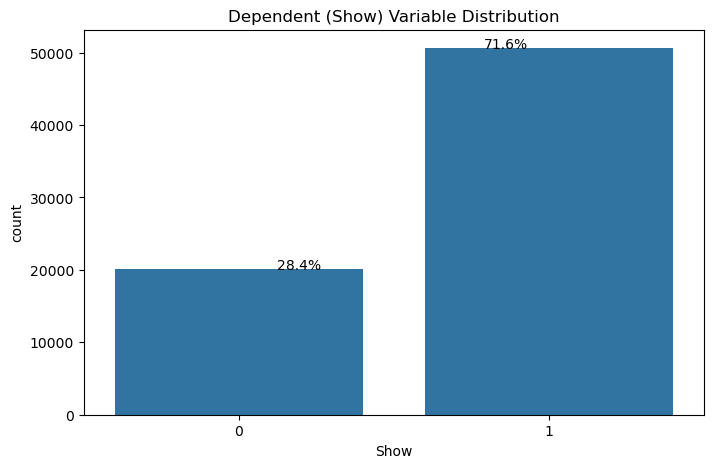

In [272]:
# plot distibution of show
plt.figure(figsize=(8,5))
base_color = sns.color_palette()[0]
total = float(len(df))
ax = sns.countplot(data=df, x='Show', color=base_color)
plt.title('Dependent (Show) Variable Distribution')
plt.xlabel('Show')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*(p.get_height()/total))
    x = (p.get_x() + p.get_width()) / 1.5
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha='right')
plt.show()                                                                 

In tha bove bar graph, '0' means no-show and '1' means show. It could be seen from the distribution above that the dataset is imbalance as there are more than twice the record of patients that showed up for appointment than those that did not show up. This is not going to be of concern since we are only after knowing factors related to whether or not a patient would show up for appointment. Next we would try to see the distribution of all independent variables:

### What are the distributions of the numeric independent variables ('Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received' and 'Waiting_Days') ?

In [273]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed.
    Argument : Dataframe
    """
    for col in df:
        if df[col].dtypes != 'object':
            plt.figure(figsize=(12,5))
            plt.title('Distribution of '+ col)
            ax = sns.countplot(data=df, x=col)
            plt.tight_layout()
            plt.show()

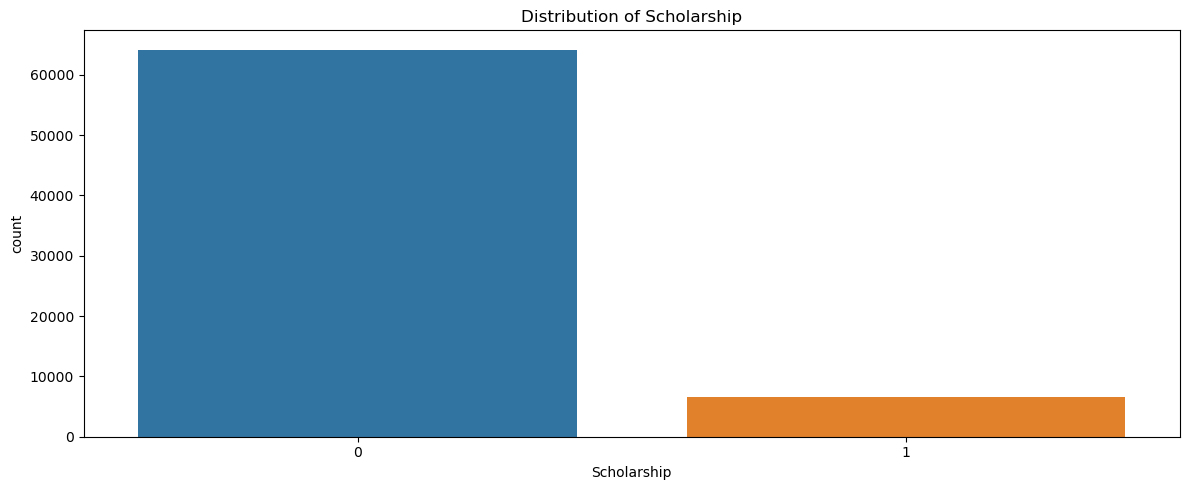

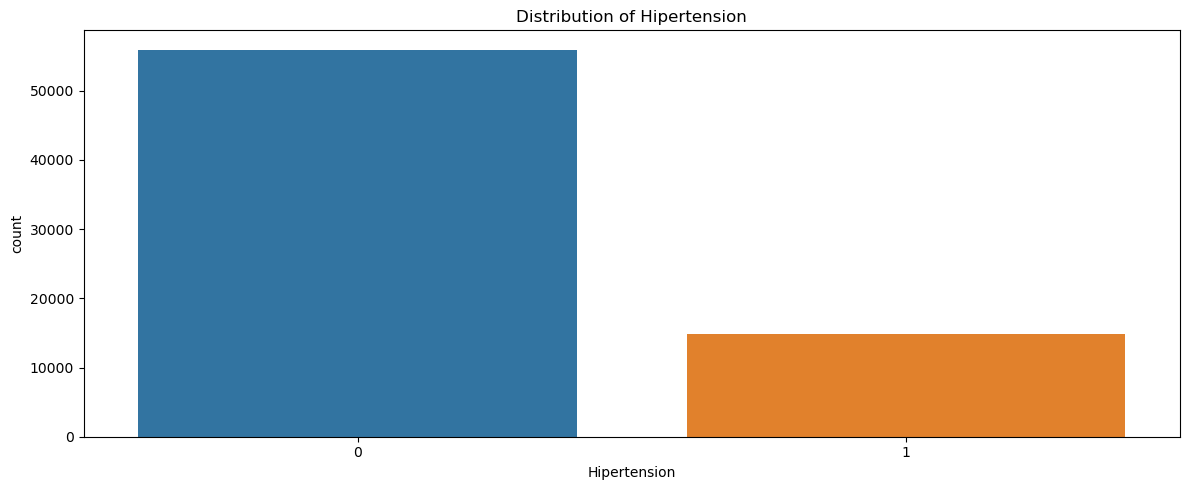

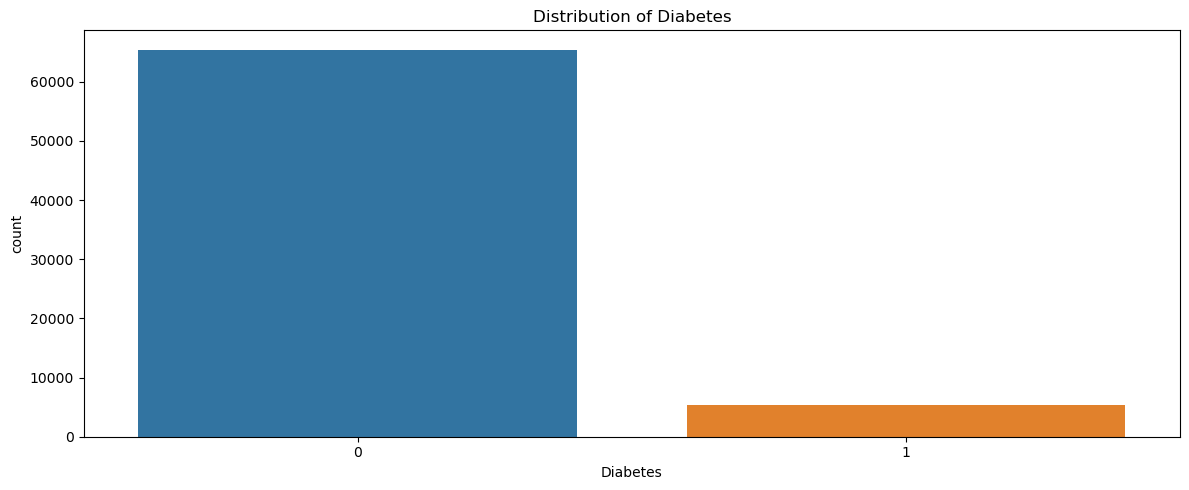

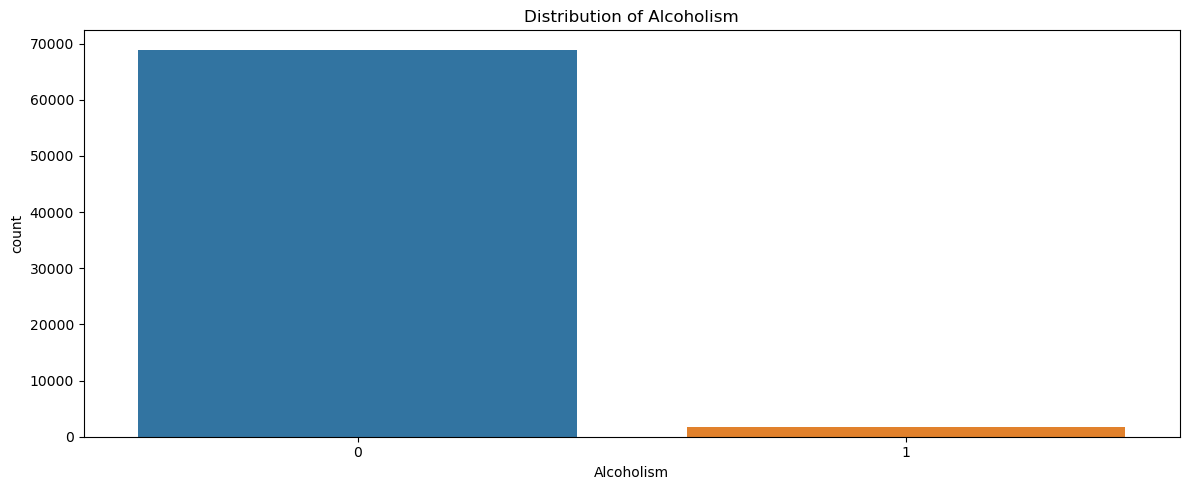

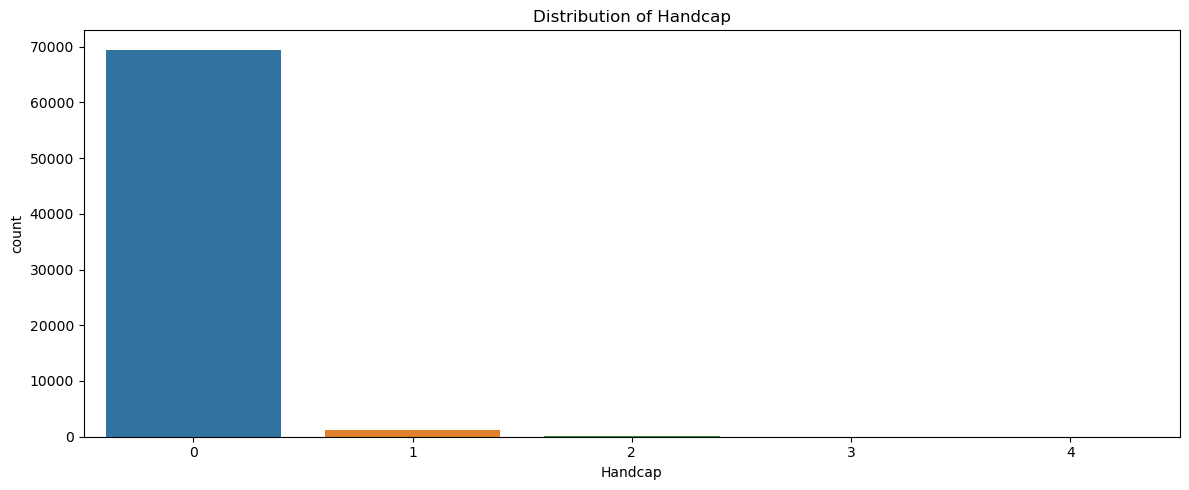

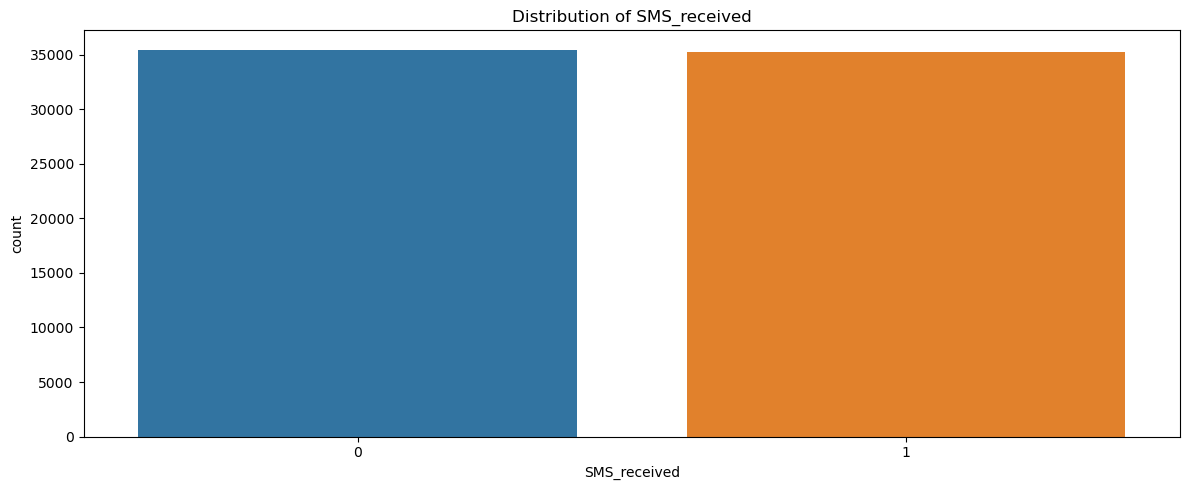

In [274]:
numeric_distribution_plot(df.drop(['Waiting_Days', 'Show', 'Age'], axis=1))

The distributions of most dichotomous variables are highly skewed except for SMS_received. Most patients recorded are not into Scholarship, Hypertension, Diabetes, alcoholism and with most of them in the level 0 of the Handicap hierachy. 
I think in this case the SMS_received is the most relevant variable that we can analyse, since it's the only one that have a better distribution between the amount of patients.

Also we can check out the appointment_waiting_days since it's one of the most relevant variables that we can mix up.

I'll now look at the other features in the data to see if any of them hold interesting properties.

### What are the distributions of the non_numeric independent variables ('Gender', 'Neighbourhood', Appointment_Day_Of_The_Week) ?

In [275]:
def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    for col in df:
        if df[col].dtype == 'object':
            plt.figure(figsize=(12,5))
            ax = sns.countplot(data=df, x=col)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
            plt.title('Distribution of '+ col)
            plt.tight_layout()
            plt.show()

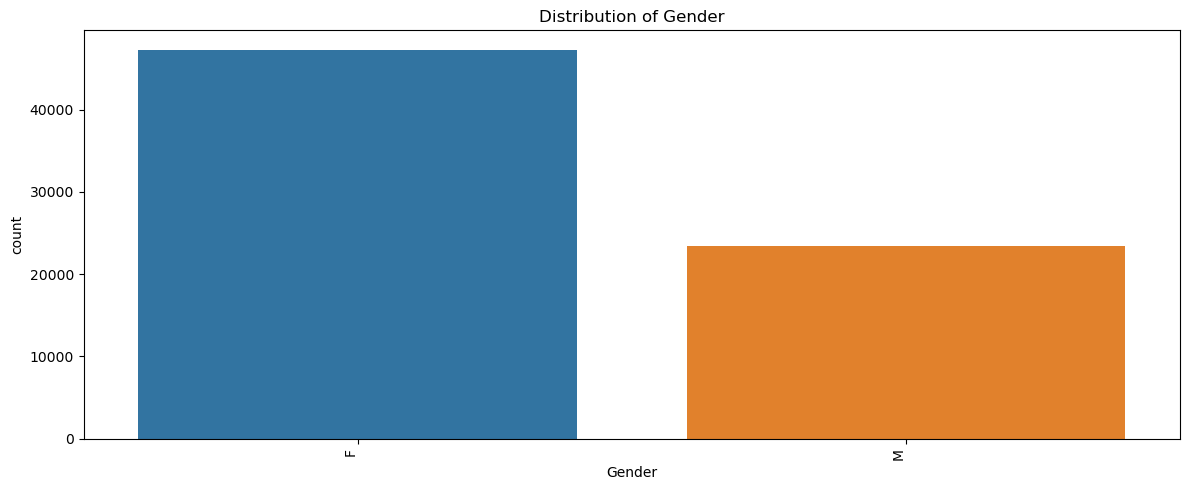

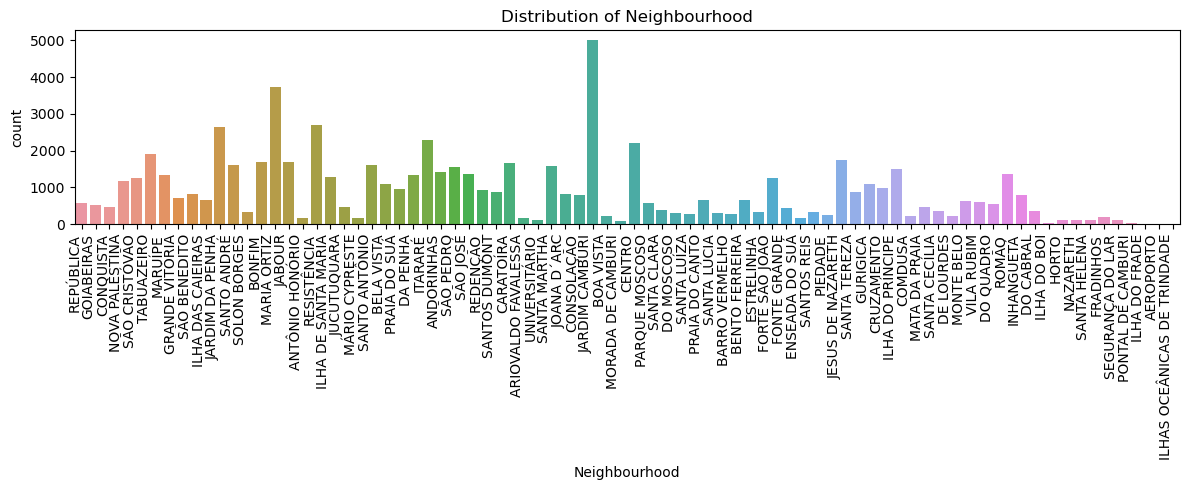

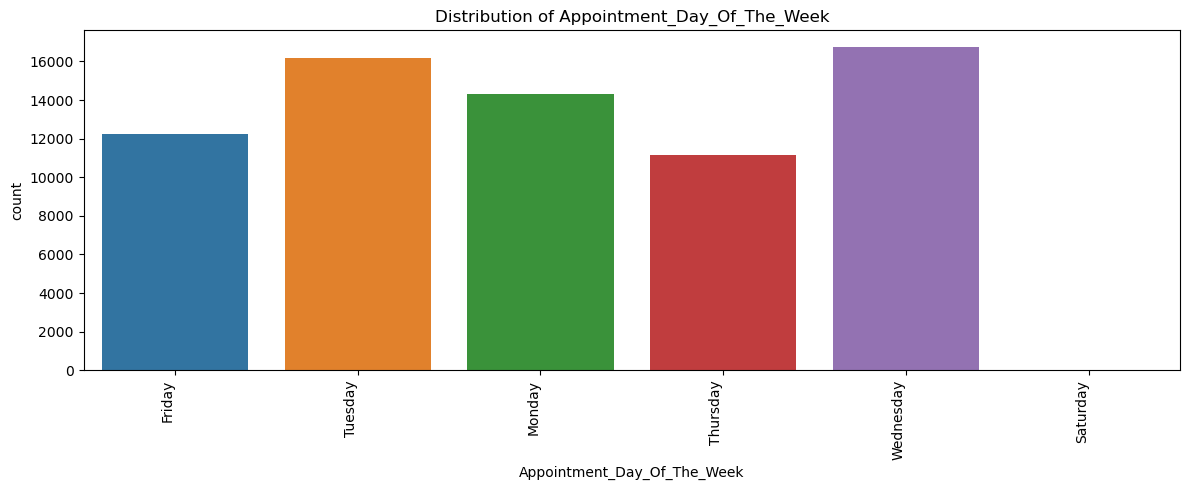

In [276]:
object_count_plot(df)

The population of female in the dataset could be seen to be twice that of male. The most popular Neighourhood appeared to be Boa Vista with the most sheduled day of the week being Tuesday.

#### What are the Distribution of Waiting_Days and Age?

In [277]:
def distribution_plot(df):
    """
    Description : Gives distribution plot for the numeric features with many unique values in the dataframe passed
    Argument : Dataframe
    """
    for col in df:
        if df[col].dtype != 'object':
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col])
            plt.tight_layout()
            plt.show()

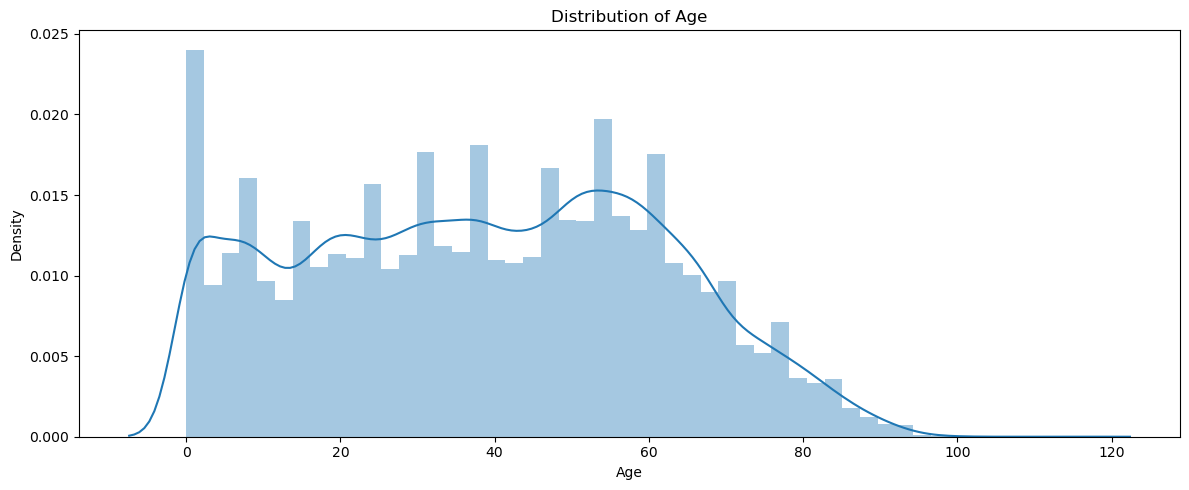

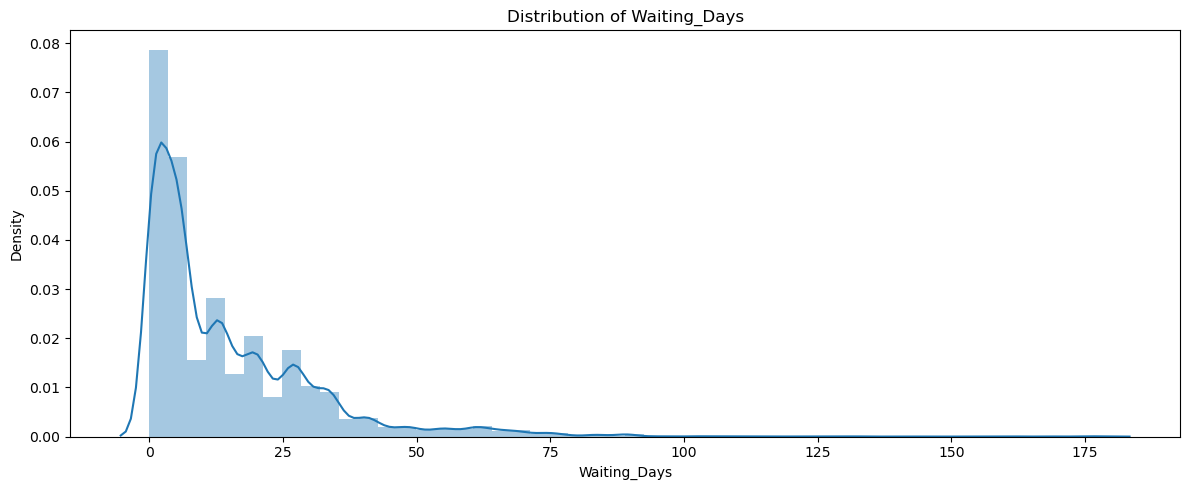

In [278]:
distribution_plot(df[['Age', 'Waiting_Days']])

The Age and Waiting_Days distribution are as shown above. Age is slightly right skewed - most of the patients are below 60 years of age. While Waiting_Days is highly right-skewed.
Now to the major concern of the project, I would be looking into the relationship between each feature and the Show variable to tell which can be used to predict the likeliness of a patient showing up and not showing up.

> ## Bivariate/Multivariate Exploration

Seeing that most variables aren't evenly distributed, plots and inferences would be made most of the time from the proportion/ratio of the `Show` variable among the categories of all other variables.

In [279]:
# check for variable datatypes
df.dtypes

Gender                         object
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
Appointment_Day_Of_The_Week    object
Waiting_Days                    int64
Show                            int64
dtype: object

Datatype check above would help in deciding the best exploration approach to use on each variable. To start off with, I want to look at the pairwise correlations present between features in the data.

In [280]:
numeric_vars = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
               'Waiting_Days', 'Show']
categoric_vars = ['Gender', 'Neighbourhood', 'Appointment_Day_Of_The_Week']

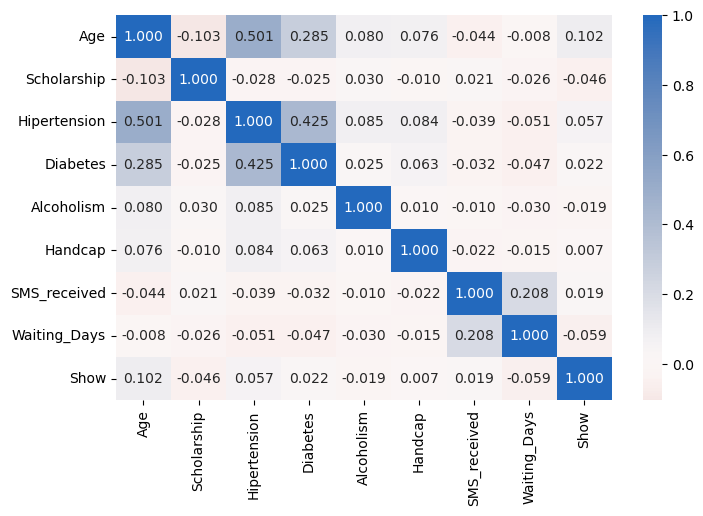

In [281]:
# corelation plot
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_vars].corr(), annot=True, cmap='vlag_r', center=0, fmt='.3f')
plt.show()

As seen from the correlation plot above, Hipertension is moderately correlated with Age. We can identify the trend that Age is a factor in determining Hipertension.
Also, a poor positve correlation could be seen between the Age and the Show. This will be worth extra exploration in this section. 
I won't perform any further analyses with other numeric variables since they don't look like they'll be of much further interest - Except Waiting_Days and SMS_received as these should by intuition have impact on whether a patient would show up or not.

Let's move on to looking at how Age is related to the Show variable.

#### How is the Age of the patients related to Show?

I would like to look at the general relationship between the Age and Show by first finding the rate of showing up/not showing up among the different ages. Then, I would look into finding age averages of the patients that showed up and those that did not.

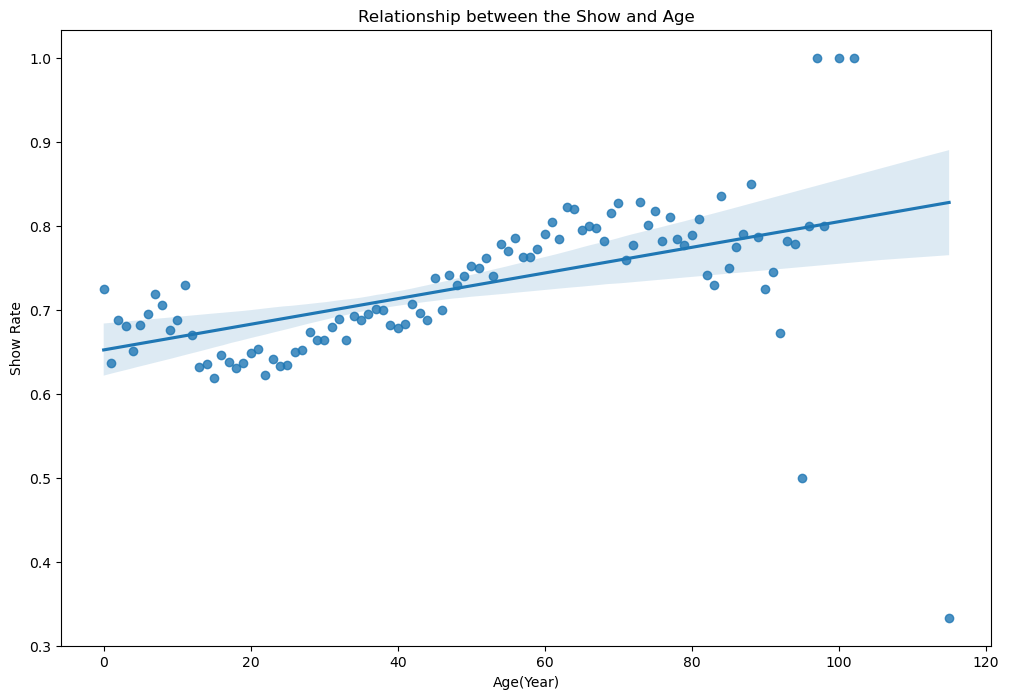

In [282]:
# group the data by Age
plt.figure(figsize=(12,8))
age_group = df.groupby('Age').mean()
sns.regplot(data=age_group, x=age_group.index, y='Show', fit_reg=True)
plt.title('Relationship between the Show and Age')
plt.xlabel('Age(Year)')
plt.ylabel('Show Rate')
plt.show()

<Figure size 800x600 with 0 Axes>

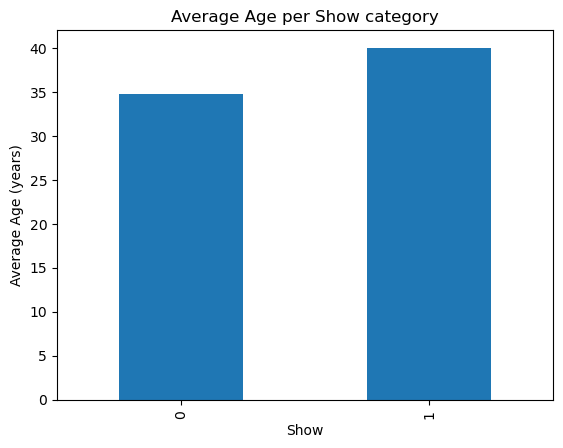

In [283]:
# Group data by show
plt.figure(figsize=(8,6))
df_group = df.groupby('Show', as_index= False).mean()
df_group.plot(kind='bar', x='Show',y='Age', legend=False)
plt.title("Average Age per Show category")
plt.ylabel("Average Age (years)")
plt.show()

The regression plot from above made it evident that the rate of showing up for appointment slighly increases with age. This indicates a positive relationship between the Age and the Show variable.
Also, the plot of average Age per Show category indicates on average that older patients tend to show up for appointment. 
These makes Age a potential predictor of whether or not a patient would show up for appointment. And if we recall from the pearson correlation chart that Hipertension is correlated with Age, we can then infer from it that, Hipertension too would help in determining if a patient will show up or not.

#### How is the Waiting_Days of the patients related to Show?

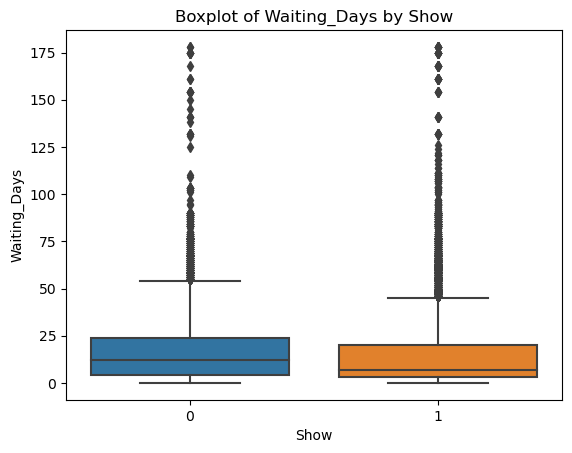

In [284]:
# plot boxplot
sns.boxplot(x="Show", y="Waiting_Days", data=df)
plt.title("Boxplot of Waiting_Days by Show")
plt.show()

Could be seen that the distributions of Waiting_Days between the patients showing and not showing up have a significant overlap, and so Waiting_Days would not be a good predictor of Show. Let's examine this in another angle:

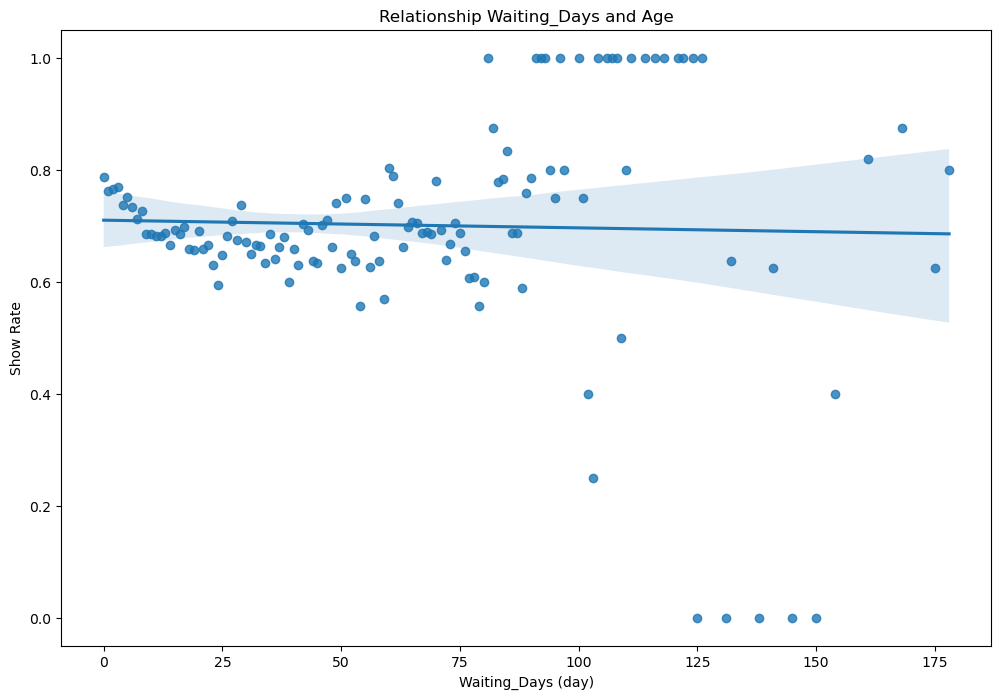

In [285]:
# group the data by Age
Waiting_group = df.groupby('Waiting_Days').mean()
plt.figure(figsize=(12,8))
sns.regplot(data = Waiting_group, x = Waiting_group.index, y = 'Show', fit_reg = True)
plt.title("Relationship Waiting_Days and Age")
plt.xlabel("Waiting_Days (day)")
plt.ylabel("Show Rate")
plt.show()

As said earlier, Waiting_Days does not seem like a reliable predictor of the Show at all since the regression line is very close to horizontal. Let's see how SMS_received is related to the Show variable:

#### How is SMS_received related to Show?

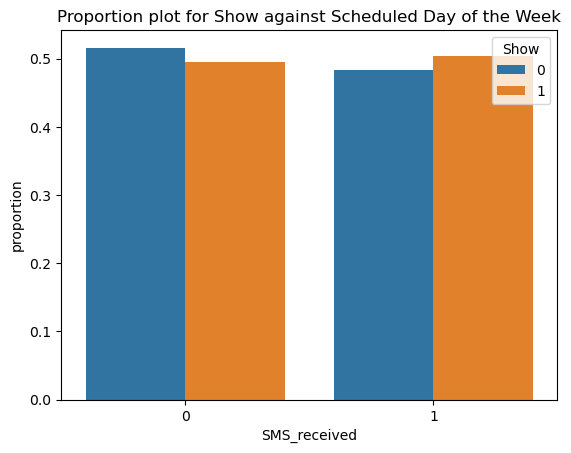

In [286]:
x, y, hue = 'SMS_received', 'proportion', 'Show'
df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot, 'data'), x=x, y=y, hue=hue)
plt.title('Proportion plot for Show against Scheduled Day of the Week')
plt.show()

When SMS is sent to patients to remind them of their appointments, they tend to show up more than when it is not. This makes SMS_received a potential predictor of Show. 
Onto how Gender affects Show:

#### How is Gender related to Show?

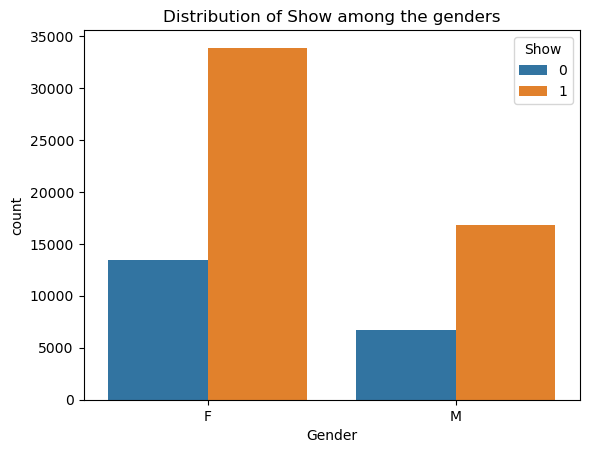

In [287]:
sns.countplot(data=df, x='Gender', hue='Show')
plt.title("Distribution of Show among the genders")
plt.show()

The chart above has just shown us that there are more Female in the data than male and also that, the proportion of Female and Male that show up/not-show up are similar and so the Gender is likely not to be a good determinant of whether a patient will show up for appointments or not. I would like to further confirm this by investigating the impact by proportion of the Gender categories on the Show variable 

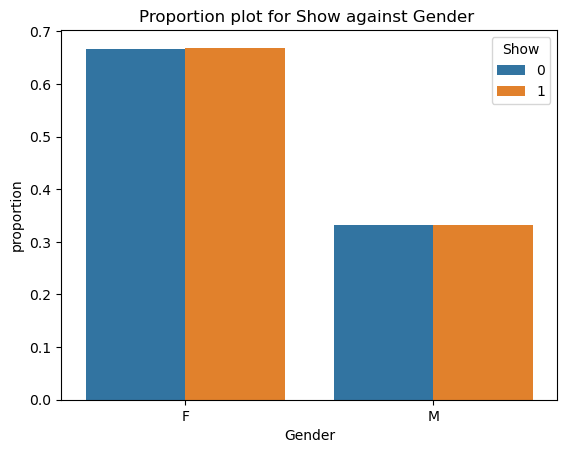

In [288]:
x, y, hue = "Gender", "proportion", "Show"
df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot, 'data'), x=x, y=y, hue=hue)
plt.title("Proportion plot for Show against Gender ")
plt.show()

As expected, Eventhough there are more females in the dataset, there's no significant difference between the proportions and so Gender would not be a good predictor of Show. Let's examine Neighbourhood and Show:

#### How is Neighbourhood related to Show?

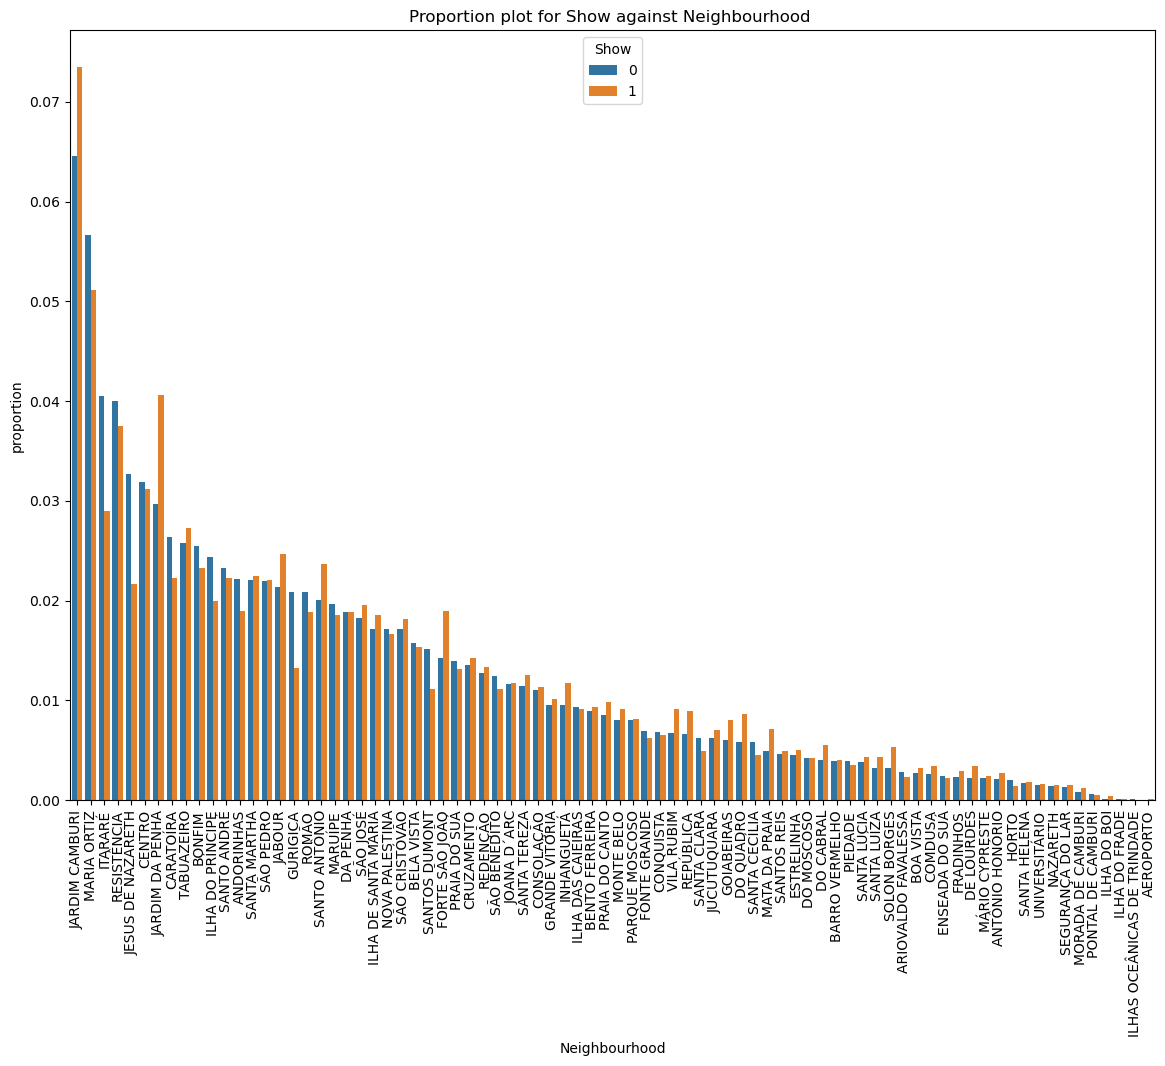

In [289]:
x, y, hue = "Neighbourhood", "proportion", "Show"
plt.figure(figsize=(14,10))
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Proportion plot for Show against Neighbourhood ")
plt.xticks(rotation=90)
plt.show()

Seeing from the above bar chart, it could been seen some Neighbourhoods are represented more on the data than others which makes the "proportional" chart above appropriate for this analysis. There however doesn't seem to be any significant effect of the Neighbourhood a patient is from, on their possibility of showing up or not. I will now move to see how the day of appointment affects the showing up of a patient for appointment:

#### Is there a relationship between the  Appointment_Day_Of_The_Week and Show?

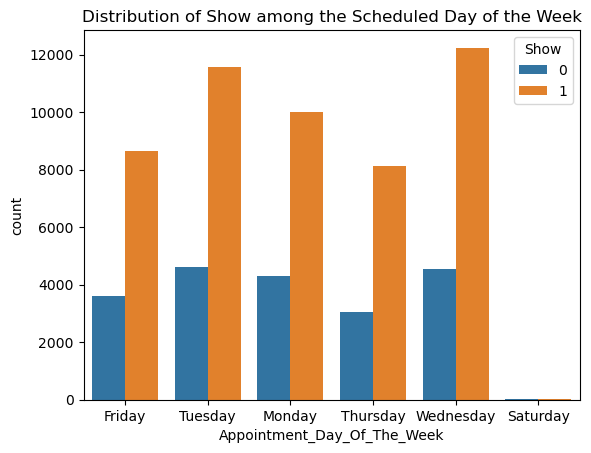

In [290]:
# make the count plot
sns.countplot(x="Appointment_Day_Of_The_Week", hue="Show",data=df)
plt.title("Distribution of Show among the Scheduled Day of the Week")
plt.show()

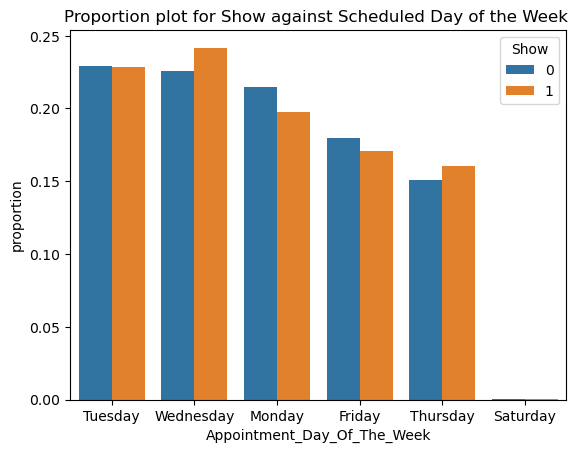

In [291]:
#plot
x, y, hue = "Appointment_Day_Of_The_Week", "proportion", "Show"
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Proportion plot for Show against Scheduled Day of the Week ")
plt.show()

Seeing from the charts that most scheduled day of the week is Tuesday, followed by wednesday, Monday and so on, with Saturday being the very least. However,regardless of the day it is, the rate/proportion of patients showing up and not showing up remain the same for all Days of the week. Hence, The Scheduled_Day_Of_The_Week is not relevant to determining the decision of the Patient.

<a id='conclusions'></a>
## Conclusions

Using both Univariate and Bivariate analysis involving distribution plots using proportions due to the imbalance of the dataset, it could be seen that:

* Age is correlated to Hipertension and these two variables have effects on whether a patient would show up for appointment or not. The probability of patient showing up increases with age.
* SMS notification for the appointment is quite neccessary for a patient to show up for appointment.
* Scholarship,Diabetes, Alcoholism, Handcap, Waiting_Days, Gender', Neighbourhood and Appointment_Day_Of_The_Week doesn't seem to affect the decision of a patient in showing up or not.

<a id='limitations'></a>
## Limitations
The presence of invalid entries posed a great limitation to this project. Such situations are explained below:
* It was realized during analysis that some appointments were scheduled for past date, i.e the AppointmentDay came before the ScheduledDay. There could be so many occurences of wrong inputs like that which would have appeared valid when checked and affect the result of the analysis.
*  About 1.3K duplicated entries were discovered and removed from the dataset. Removing these entries that came with different AppointmentID and other invalid entries reduced the volume of data used for this analysis and could make the analysis result inaccurate.

Also;
* The imbalance of the dataset which might have resulted from the fact that the data available is only recorded for some occurences in a year also posed a bit of limitation on the analysis result. Having data spanning over different years would have helped in the understanding of the patients better.
* There might be many other factors that can effect individual's decision to show up for appointment or not which are not covered in the dataset. Factors  such as the patient's occupation and so many others. 

<a id='references'></a>
## References

* https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot